# Fake And Real News Detection Data Preprocessing

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
import re
import pickle


In [2]:
# importing the dataset
first_data = pd.read_csv('../data/fake_and_real_data.csv')
first_data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
# second dataset 
# 0 = Fake news and 1 = Real News
second_data = pd.read_csv('../data/WELFake_Dataset.csv')

In [4]:
print(second_data.shape)
print(second_data.describe())
print(second_data.info())

(72134, 4)
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    18033.250000      0.000000
50%    36066.500000      1.000000
75%    54099.750000      1.000000
max    72133.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None


In [5]:
# Checking for missing values

second_data.isnull().sum()

# Dropping the missing values
second_data = second_data.dropna()




In [6]:
# Checking for duplicates

second_data.duplicated().sum()

# Drop unnamed column
second_data.drop('Unnamed: 0', axis=1, inplace=True)


In [7]:
# concatinating title and text
second_data['text'] = second_data['title'] + ' ' + second_data['text']


In [8]:
# Dropping the title column
second_data = second_data.drop(['title'], axis=1)

In [9]:
second_data.head()

,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
5,About Time! Christian Group Sues Amazon and SP...,1


In [10]:
first_data.shape
first_data.describe()
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [11]:
# Checking for missing values

first_data.isnull().sum()



Text     0
label    0
dtype: int64

In [12]:
# Checking for duplicates

first_data.duplicated().sum()

35

In [13]:
# handle duplicated values
first_data.drop_duplicates(inplace=True)


first_data['label_t'] = 0


first_data.head

<bound method NDFrame.head of                                                    Text label  label_t
0      Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake        0
1     U.S. conservative leader optimistic of common ...  Real        0
2     Trump proposes U.S. tax overhaul, stirs concer...  Real        0
3      Court Forces Ohio To Allow Millions Of Illega...  Fake        0
4     Democrats say Trump agrees to work on immigrat...  Real        0
...                                                 ...   ...      ...
9895   Wikileaks Admits To Screwing Up IMMENSELY Wit...  Fake        0
9896  Trump consults Republican senators on Fed chie...  Real        0
9897  Trump lawyers say judge lacks jurisdiction for...  Real        0
9898   WATCH: Right-Wing Pastor Falsely Credits Trum...  Fake        0
9899   Sean Spicer HILARIOUSLY Branded As Chickensh*...  Fake        0

[9865 rows x 3 columns]>

In [14]:
# Preprocessing the data
first_data['label_t'] = (first_data['label'] != 'Fake').astype(int)
first_data = first_data.drop(['label'], axis=1)
first_data = first_data.rename(columns={'label_t': 'label'})
first_data = first_data.rename(columns={'Text': 'text'})
first_data.head()


,text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


In [15]:
# Dropping the unnecessary columns
first_data.head()
# converting the text to lowercase
def preprocess(text):
    text = re.sub(r'[^\w\s\']', ' ', text)
    text = re.sub(r' +', ' ', text)
    return text.strip().lower()

first_data['text'] = first_data['text'].apply(preprocess)
second_data['text'] = second_data['text'].apply(preprocess)






In [16]:
first_data.head()
second_data.head()

concat_data = pd.concat([first_data, second_data], axis=0)
concat_data.head()


,text,label
0,top trump surrogate brutally stabs him in the ...,0
1,u s conservative leader optimistic of common g...,1
2,trump proposes u s tax overhaul stirs concerns...,1
3,court forces ohio to allow millions of illegal...,0
4,democrats say trump agrees to work on immigrat...,1


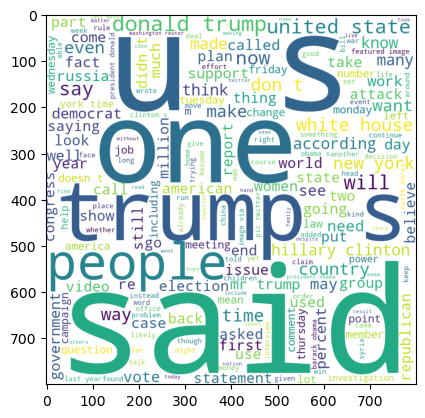

In [17]:
from matplotlib import pyplot as plt


wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(concat_data['text']))
plt.imshow(wc)

In [18]:
# Splitting Data to train and test

x_train, x_test, y_train, y_test = train_test_split(concat_data['text'], concat_data['label'], test_size=0.3, random_state=42)


x_train.head


<bound method NDFrame.head of 51491    joke of the week a marine a priest and a flag ...
33790    is hillary clinton s entourage involved in a s...
57683    candace cameron bure dishes on the main conser...
20636    migrants and smugglers won t be stopped by don...
9218     gas prices could drop toward 1 a gallon in som...
                               ...                        
6282     russia's lavrov show me at least one fact mosc...
45357    actor steven seagal on live tv erupts on hilla...
67514    grab the popcorn trump unloads on ted cruz nob...
860      democratic senator lifts hold on trump antitru...
5973     trump and may to discuss expanding u s british...
Name: text, Length: 56981, dtype: object>

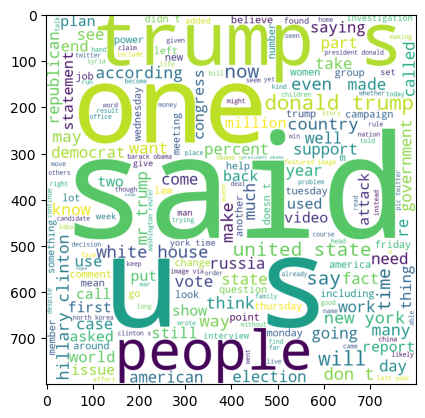

In [19]:
x_train_wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(x_train))
plt.imshow(x_train_wc)




In [20]:
# make a statistich with word trump and if it fake or real
trump_data = concat_data[concat_data['text'].str.contains('trump')]

trump_data.head()
# make this statistics all around the dataset
def word_statistics(data, word):
    word_data = data[data['text'].str.contains(word)]
    return word_data['label'].value_counts()

# do it in all words that in dataset
word_statistics(concat_data, 'trump')


label
1    21435
0    20200
Name: count, dtype: int64

In [21]:
# Saving data

x_train_path = './x_train.pkl'
x_test_path = './x_test.pkl'
y_train_path = './y_train.pkl'
y_test_path = './y_test.pkl'

with open(x_train_path, 'wb') as file:
    pickle.dump(x_train, file)

with open(x_test_path, 'wb') as file:
    pickle.dump(x_test, file)

with open(y_train_path, 'wb') as file:
    pickle.dump(y_train, file)

with open(y_test_path, 'wb') as file:
    pickle.dump(y_test, file)